# TP SEMANAL N°6
### Juan Ignacio Jimenez Copati

## *CONSIGNA*

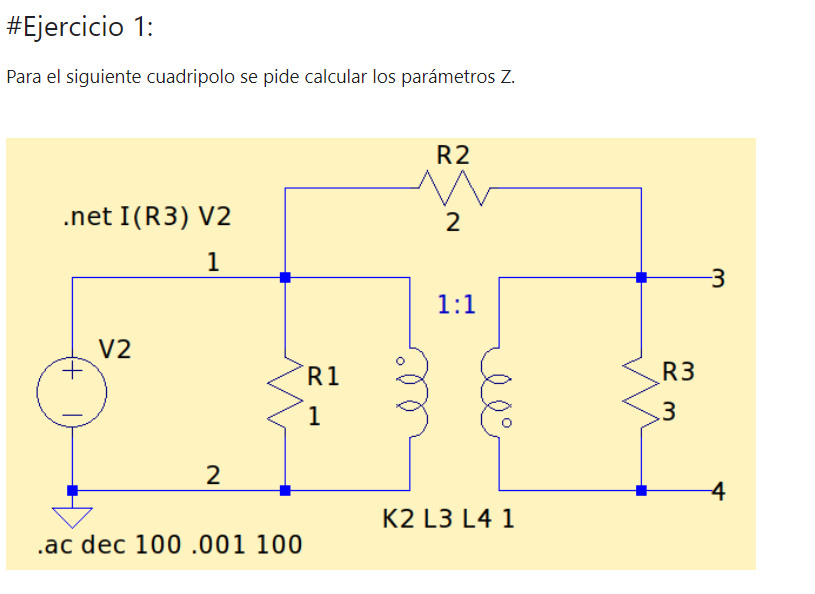

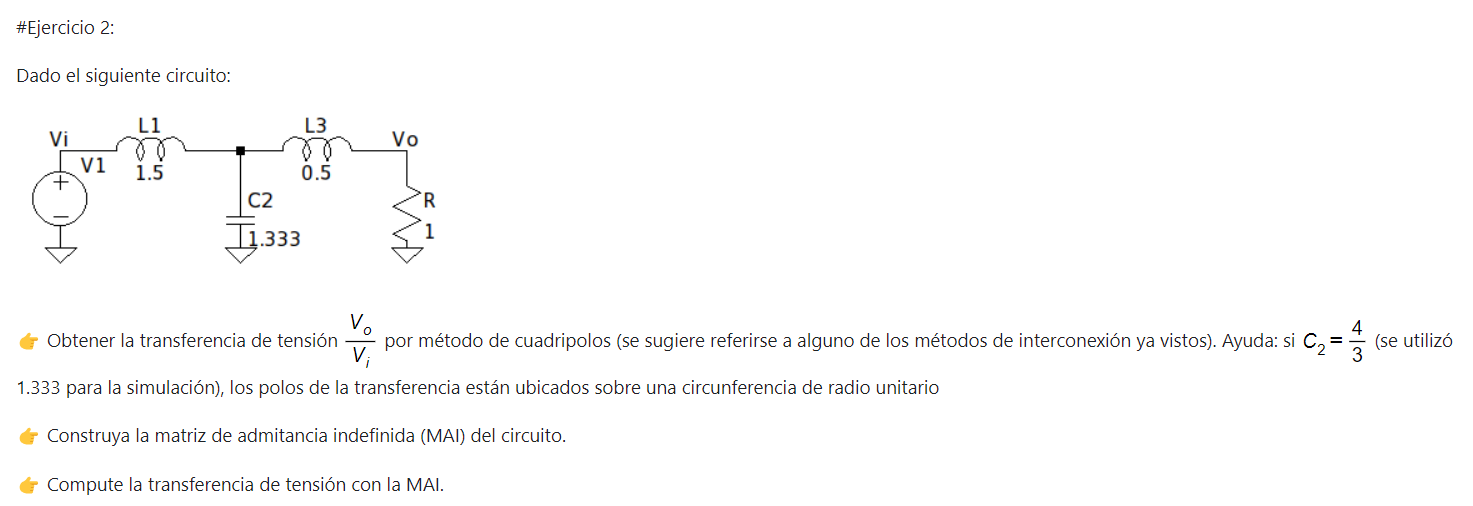

In [34]:
from IPython.display import IFrame
IFrame("./TP6.pdf", width=960, height=1000)

## *Análisis circuital parte 1*

Falta hacer una revisión ya que no se comprendieron los resultados obtenidos.

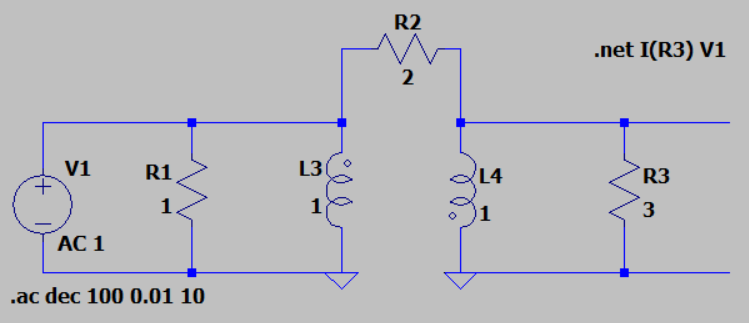

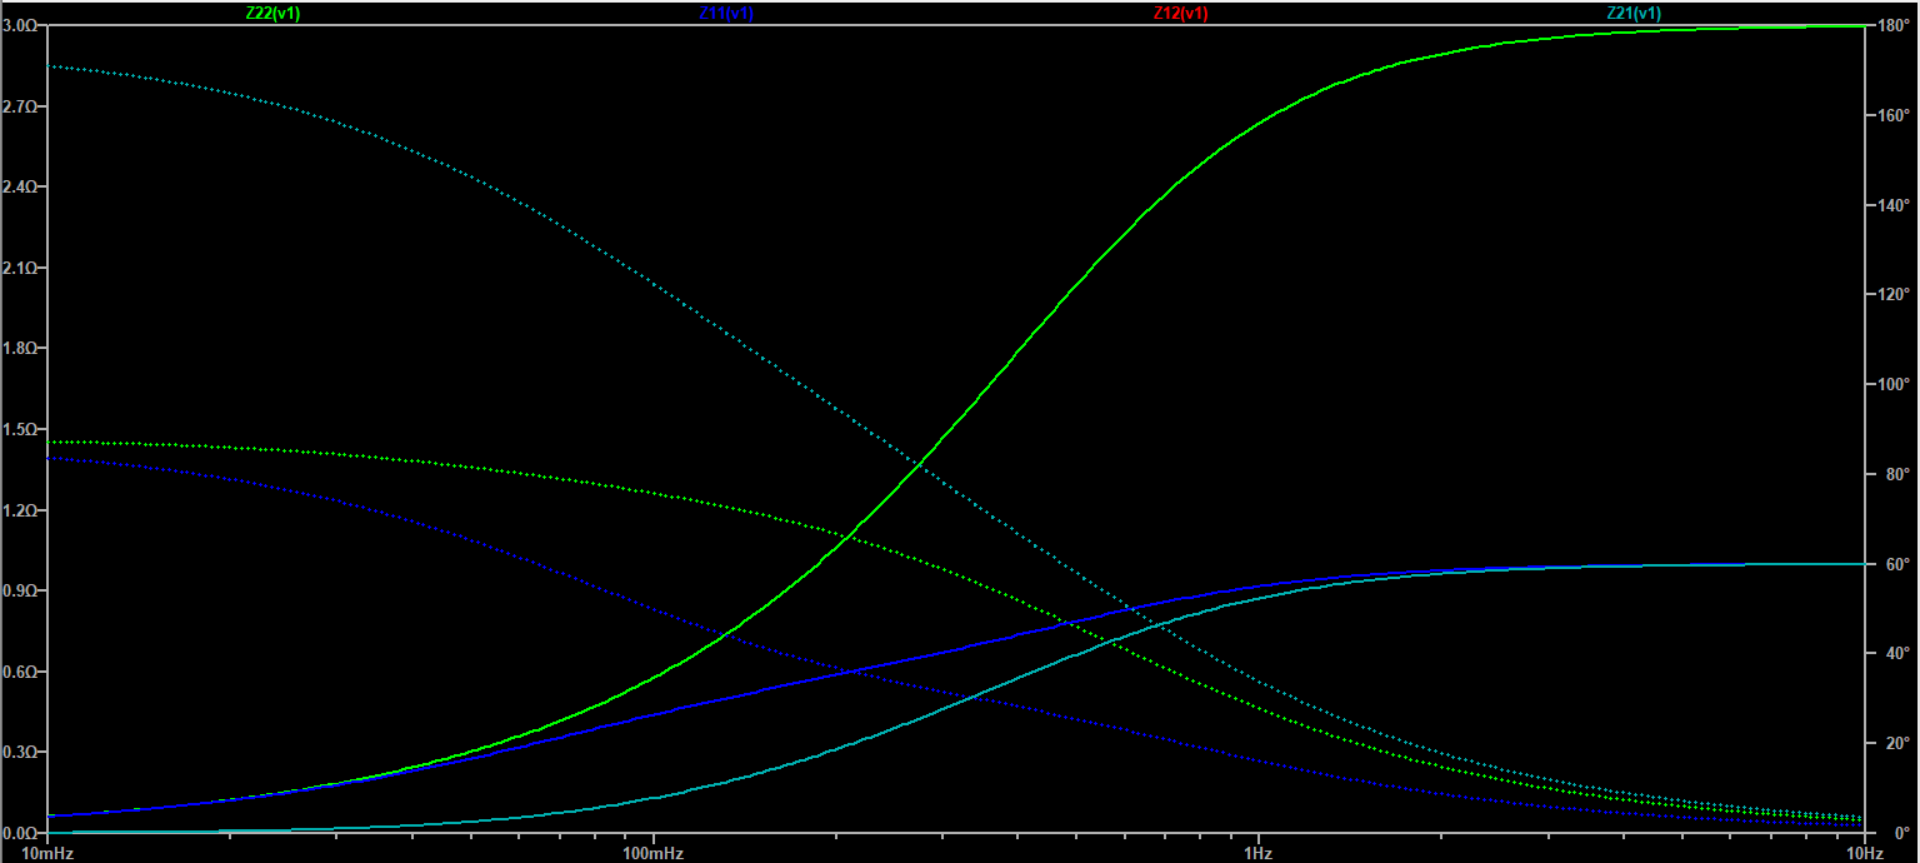

## *Análisis numérico parte 2*

In [32]:
import sympy as sp

from pytc2.cuadripolos import calc_MAI_impedance_ij, calc_MAI_vtransf_ij_mn, calc_MAI_ztransf_ij_mn
from pytc2.general import print_latex
from IPython.display import display, Markdown

'''    
+ Numeramos los polos de 0 a n=3


    (0)----Ya--(1)---Yc--(2)
                |         |
                Yb        G
                |         |
    (3)---------+----------
    
'''    
L1, L2, C, G = sp.symbols('L1 L2 C G', real=True, positive=True)
S = sp.symbols('S', complex=True)


# Armo la MAI

#               Nodos: 0      1        2        3


Ymai = sp.Matrix([  
                    [ 1/(S*L1),   -1/(S*L1)  ,             0,            0    ],
                    [ -1/(S*L1),  1/(S*L1)+S*C+1/(S*L2),   -1/(S*L2),    -S*C ],
                    [ 0,          -1/(S*L2),               1/(S*L2)+G,     -G   ],
                    [ 0,          -S*C,                    -G,           S*C+G]
                 ])


# Calculo la Z en el puerto de entrada a partir de la MAI
###########################################################################################
display(Markdown('### Calculo la impedancia de entrada a partir de la MAI' ))

Zmai = calc_MAI_impedance_ij(Ymai, 0, 3)   # Puerto 0-3
print_latex( r'Z^{{ {:d}{:d} }} = '.format(0, 3) + sp.latex(Zmai)  )
###########################################################################################
###########################################################################################
display(Markdown('### Verifico la transferencia de tension hallada en papel:' ))

Vmai = calc_MAI_vtransf_ij_mn(Ymai, 2, 3, 0, 3)  # Entrada en 0-3, salida en 2-3
Vmai=sp.collect(Vmai, S)
print_latex( r'T^{{ {:d}{:d} }}_{{ {:d}{:d} }} = '.format(2, 3, 0, 3) + sp.latex(Vmai)  )
Vmai=sp.simplify(Vmai.subs(G,1))
Vmai=sp.simplify(Vmai.subs(L1,3/2))
Vmai=sp.simplify(Vmai.subs(L2,1/2))
Vmai=sp.simplify(Vmai.subs(C,4/3))
Vmai=sp.simplify(Vmai)
print_latex( r'T^{{ {:d}{:d} }}_{{ {:d}{:d} }} = '.format(2, 3, 0, 3) + sp.latex(Vmai)  )
###########################################################################################

### Calculo la impedancia de entrada a partir de la MAI

<IPython.core.display.Math object>

### Verifico la transferencia de tension hallada en papel:

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## *Análisis circuital parte 2*

### *Circuito del TP*

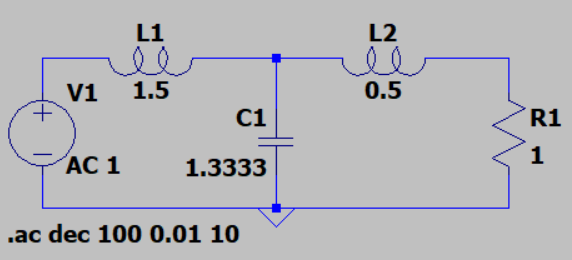

Hciendo una simulación del módulo y fase del ciurcuito a lo largo de las frecuencias cercanas a 159mHz (ω0=1) se obtiene:

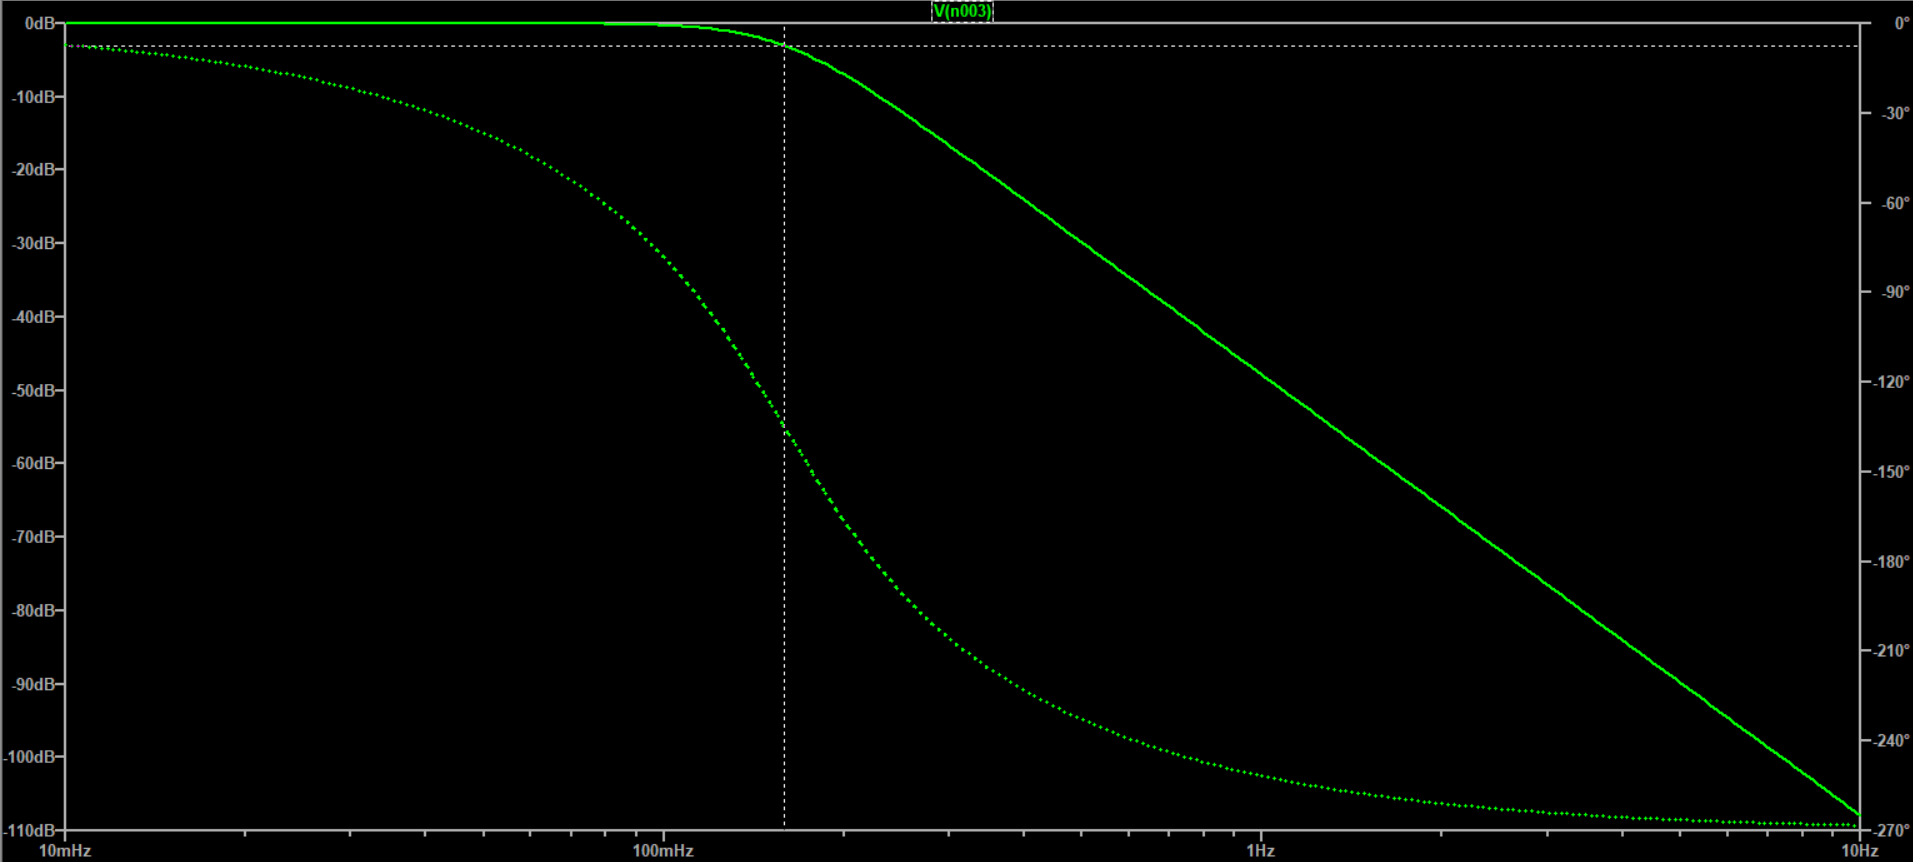

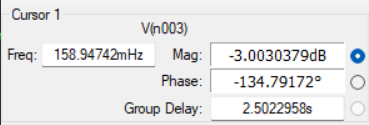

Coincidiendo la frecuencia de corte con 159mHz y la pendiente del pasa bajos con -60dB/dec como se había anticipado.